# Exercise 5 #

###  Solved by Henrik Fischbeck and Tiago Pereira ###

## Problem 1 ##


We find the Gradient of the function in questing. 
Grad f= [2x, 2(y-8)]
we start at 0 and grad f(0,0) = (0,-16)   
We minimize alpha (exact) by partially differentiating f(x_0 - alpha* grad f(x_0)) w.r.t. alpha and setting =0
and we end up with differentiating f(0,16alpha) = 2*(-16)*(-16alpha -8) =512alpha +256=0  implies alpha= -256/512=-1/2
Thus we are ready for first step of gradient method; x_next= x_now +alpha*d. where d = - grad f(x_now).

x_next= (0,0) +-0.5*(0,16) =  (0,-8).

now set x_1 = (0,-8) and then; grad f(0,-8) = [0, 2(-8-8)] =[0,-32]
partially differentiating f(x_1 - alpha* grad f(x_1)) w.r.t. alpha and setting =0
f( [0,-8] - alpha [0,-32]) = f(0,-8+32alpha)= 2(-8+32alpha -(differentiate)-> = 2(-8+32alpha-8)*32 =-1024+2048alpha , alpha=-0.5
x_next= x_awnser= (0,-8) +-0.5(0,-32) = (0,8) wich is  the awnser of argmin x^2 +(y-8)^2 .

## Problem 2 ##

## a) ##

In [227]:
import numpy as np
import matplotlib.pyplot as plt

def linesearch_armijo(f, gradf, xk, dk, a0, c, s):
    alpha = a0
    while True:
        x_new = xk + alpha * np.array(dk)
        fxk = f(xk)
        fx_new = f(x_new)
        
        # Calculate the right side of Armijo condition
        rhs = s * alpha * np.dot(gradf(xk), dk)
        
        # Check the Armijo condition
        if (fxk - fx_new > - rhs).all():
            return alpha
        else:
            # Reduce the step size
            alpha *= c

## b) ##

In [228]:
def steepest_descent(f, gradf, x0, a0, c, s, xtol, ftol, maxiter):
    iterates = [x0]
    x = x0
    for i in range(maxiter):
        gradient = gradf(x)
        alpha = linesearch_armijo(f, gradf, x, -gradient, a0, c, s)
        x_new = x - alpha * gradient
        iterates.append(x_new)
        if np.linalg.norm(x_new - x) < xtol or abs(f(x_new) - f(x)) < ftol:
            break
        x = x_new
    return np.array(iterates)


## c) ##

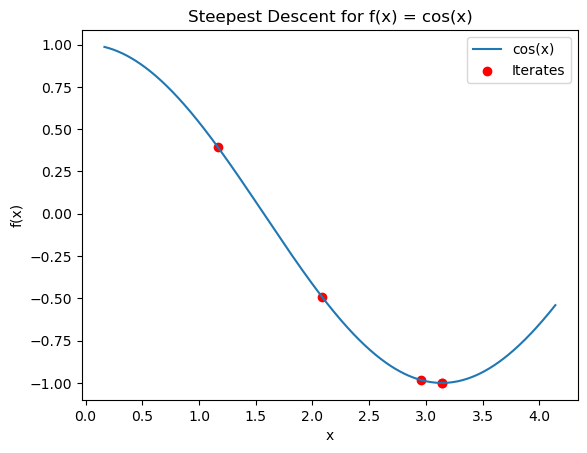

In [229]:
def f(x):
    return np.cos(x)

def gradf(x):
    return -np.sin(x)

x0 = 1.1656  # Choose a different starting point
maxiter = 1000  # Increase the number of iterations
iterates = steepest_descent(f, gradf, x0, a0=1, c=0.5, s=1e-2, xtol=1e-6, ftol=1e-6, maxiter=maxiter)

# Determine the range for plotting
x_range = np.linspace(min(iterates) - 1, max(iterates) + 1, 400)
y = f(x_range)
plt.plot(x_range, y, label="cos(x)")

it_x = np.array(iterates)
it_y = f(it_x)
plt.scatter(it_x, it_y, c='red', label="Iterates")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.title("Steepest Descent for f(x) = cos(x)")
plt.show()

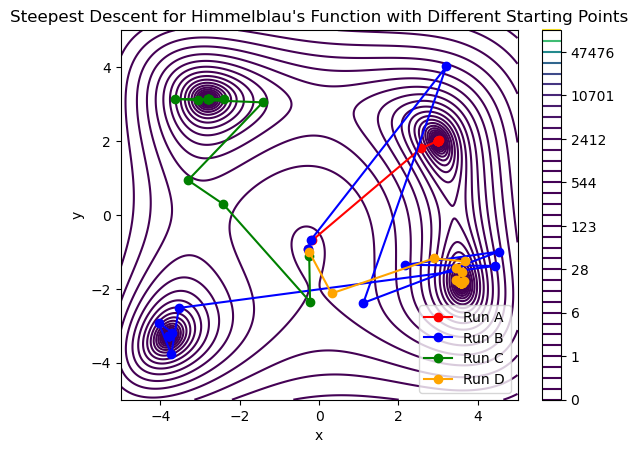

In [230]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_himmelblau(x):
    dfdx = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    dfdy = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
    return np.array([dfdx, dfdy])

# Set up the optimization parameters
x0a = np.array([-0.27, -0.91])
x0b = np.array([-0.271, -0.91])
x0c = np.array([-0.25, -1.1])
x0d = np.array([-0.25, -1])

# Run steepest descent with different starting points
iterates_a = steepest_descent(himmelblau, grad_himmelblau, x0a, a0=1, c=0.5, s=1e-2, xtol=1e-6, ftol=1e-6, maxiter=1000)
iterates_b = steepest_descent(himmelblau, grad_himmelblau, x0b, a0=1, c=0.5, s=1e-2, xtol=1e-6, ftol=1e-6, maxiter=1000)
iterates_c = steepest_descent(himmelblau, grad_himmelblau, x0c, a0=1, c=0.5, s=1e-2, xtol=1e-6, ftol=1e-6, maxiter=1000)
iterates_d = steepest_descent(himmelblau, grad_himmelblau, x0d, a0=1, c=0.5, s=1e-2, xtol=1e-6, ftol=1e-6, maxiter=1000)

# Create a contour plot
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)

# Calculate the function values using the modified himmelblau function
Z = himmelblau(np.array([X, Y]))

plt.contour(X, Y, Z, levels=np.logspace(-0.5, 5, 35), cmap='viridis')
plt.colorbar()

# Plot the iterates for all runs
it_xa = np.array(iterates_a)[:, 0]
it_ya = np.array(iterates_a)[:, 1]
plt.plot(it_xa, it_ya, marker='o', color='red', label="Run A")

it_xb = np.array(iterates_b)[:, 0]
it_yb = np.array(iterates_b)[:, 1]
plt.plot(it_xb, it_yb, marker='o', color='blue', label="Run B")

it_xc = np.array(iterates_c)[:, 0]
it_yc = np.array(iterates_c)[:, 1]
plt.plot(it_xc, it_yc, marker='o', color='green', label="Run C")

it_xd = np.array(iterates_d)[:, 0]
it_yd = np.array(iterates_d)[:, 1]
plt.plot(it_xd, it_yd, marker='o', color='orange', label="Run D")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Steepest Descent for Himmelblau's Function with Different Starting Points")
plt.show()



## Problem 3 ##

In [231]:
import numpy as np
# Define the Rosenbrock function and its gradient and Hessian
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def grad_rosenbrock(x):
    return np.array([
        -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0]),
        200 * (x[1] - x[0]**2) ])

def hess_rosenbrock(x):
    return np.array([
        [1200 * x[0]**2 - 400 * x[1] + 2, -400 * x[0]],
        [-400 * x[0], 200]
    ])

# Stopping criteria
def stopping_criteria(grad, tol):
    return np.linalg.norm(grad) <= tol

def steepest_descent(f, gradf, x0, a0, c, s, tol, maxiter):
    iterates = [x0]
    x = x0
    for i in range(maxiter):
        gradient = gradf(x)
        alpha = linesearch_armijo(f, gradf, x, -gradient, a0, c, s)
        x_new = x - alpha * gradient
        iterates.append(x_new)
        if stopping_criteria(gradient,tol):
            break
        x = x_new
    return iterates, i+1

# Conjugate Gradient method
def conjugate_gradient(f, gradf, x0, a0, c, s, tol, maxiter):
    iterates, iters_sd = steepest_descent(f, gradf, x0,  a0, c, s, tol, 1)

    x_old = iterates[-1]  # Start with the final iterate from steepest descent
    p = -gradf(x_old)
    i = 0
    
    for i in range(iters_sd, maxiter):
        gradient = gradf(x_old)
        if stopping_criteria(gradient, tol):
            break
        alpha = linesearch_armijo(f, gradf, x_old, p, a0, c, s)
        x = x_old + alpha * p
        beta = np.dot(gradf(x), gradf(x) / np.dot(gradient, gradient))
        p = -gradf(x) + beta * p
        #iterates = np.vstack((iterates, x))
        iterates.append(x)
        i+1
        x_old=x
    return iterates, i + 1

# Newton's method
def newton(f, gradf, hessf, x0, a0, c, s, tol, maxiter):
    iterates = [x0]
    x = x0
    for i in range(maxiter):
        gradient = gradf(x)
        if stopping_criteria(gradient, tol):
            break
        hessian = hessf(x)
        p = -np.linalg.solve(hessian, gradient)
        alpha = linesearch_armijo(f, gradf, x, p, a0, c, s)
        x = x + alpha * p
        iterates.append(x)

    return np.array(iterates), i + 1


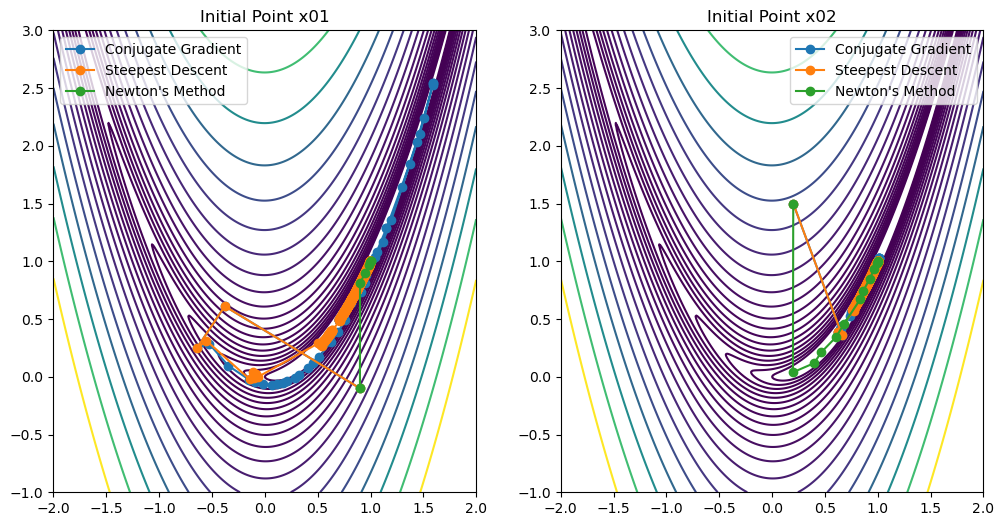

In [232]:
tol = 10e-4,
maxiter = 10000
a0 = 1
c = 0.5
s = 10e-2
x01 = np.array([0.9,-0.1])
x02 = np.array([0.2, 1.5])

t1conj, t1conj_it = conjugate_gradient(rosenbrock, grad_rosenbrock, x01, a0, c, s, tol, maxiter)
t1steep, t1steep_it  = steepest_descent(rosenbrock, grad_rosenbrock, x01, a0, c, s, tol, maxiter)
t1new, t1new_it = newton(rosenbrock, grad_rosenbrock, hess_rosenbrock, x01, a0, c, s, tol, maxiter)

t2conj, t2conj_it =  conjugate_gradient(rosenbrock, grad_rosenbrock, x02, a0, c, s, tol, maxiter)
t2steep, t2steep_it  = steepest_descent(rosenbrock, grad_rosenbrock, x02, a0, c, s, tol, maxiter)
t2new, t2new_it = newton(rosenbrock, grad_rosenbrock, hess_rosenbrock, x02, a0, c, s, tol, maxiter)

t1conj = np.array(t1conj)
t1steep = np.array(t1steep)

t2conj = np.array(t2conj)
t2steep = np.array(t2steep)

x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

# Calculate the Rosenbrock values on the grid
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = rosenbrock([X[i, j], Y[i, j]])

# Plot the contour of the Rosenbrock function
plt.figure(figsize=(12, 6))

# Contour plot for x01
plt.subplot(1, 2, 1)
plt.contour(X, Y, Z, levels=np.logspace(0, 3, 20), cmap='viridis')
plt.plot(t1conj[:, 0], t1conj[:, 1], '-o', label='Conjugate Gradient')
plt.plot(t1steep[:, 0], t1steep[:, 1], '-o', label='Steepest Descent')
plt.plot(t1new[:, 0], t1new[:, 1], '-o', label="Newton's Method")
plt.title('Initial Point x01')
plt.legend()

# Contour plot for x02
plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, levels=np.logspace(0, 3, 20), cmap='viridis')
plt.plot(t2conj[:, 0], t2conj[:, 1], '-o', label='Conjugate Gradient')
plt.plot(t2steep[:, 0], t2steep[:, 1], '-o', label='Steepest Descent')
plt.plot(t2new[:, 0], t2new[:, 1], '-o', label="Newton's Method")
plt.title('Initial Point x02')
plt.legend()

plt.show()